# Project Insight
This project focuses on predicting the salaries of individual in the AI job market.....
Focus would be on checking the correlation of each data variables and very importantly being to predict very well enough the base payment for such individual  . The evaluation metrics of this problem would be Mean_square_Error, as well as acc_score for  the accuracy of the model....This problem is a Regression problem..
The intended model to use for this problem based on the size of our dataset is Linear regression

### Importing Libaries

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error 
from sklearn import metrics

### Importing Dataset

In [2]:
DF=pd.read_csv("C:/Users/david/OneDrive/Desktop/ai_job_market_insights (1).csv")

In [3]:
DF

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


In [4]:
DS=DF.copy()

In [5]:
DS

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


#### Checking for missing values

In [6]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [7]:
DS.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


### DATA CLEANING AND EDA

<Axes: xlabel='Company_Size', ylabel='Salary_USD'>

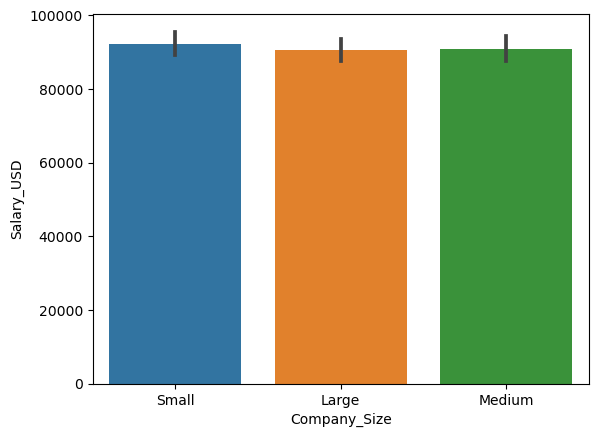

In [8]:
sns.barplot(x='Company_Size',y='Salary_USD', data=DS)

<Axes: xlabel='Location', ylabel='Salary_USD'>

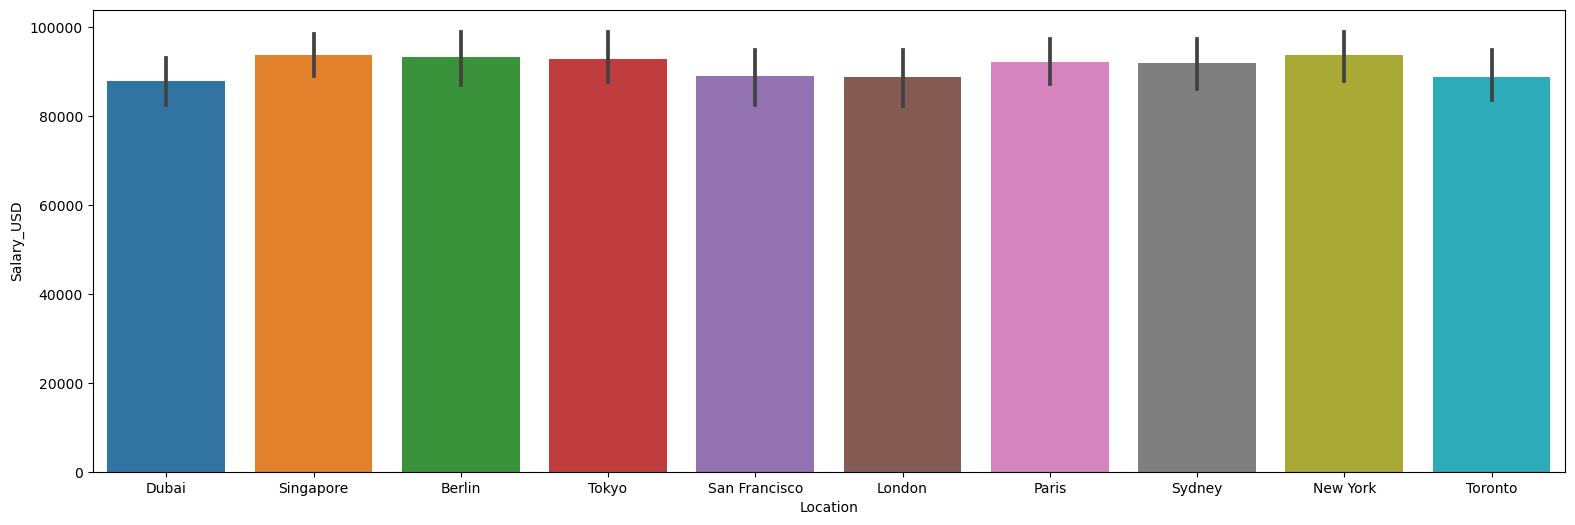

In [9]:
plt.figure(figsize=(19,6))
sns.barplot(x='Location',y='Salary_USD', data=DS)

<Axes: xlabel='Location', ylabel='Salary_USD'>

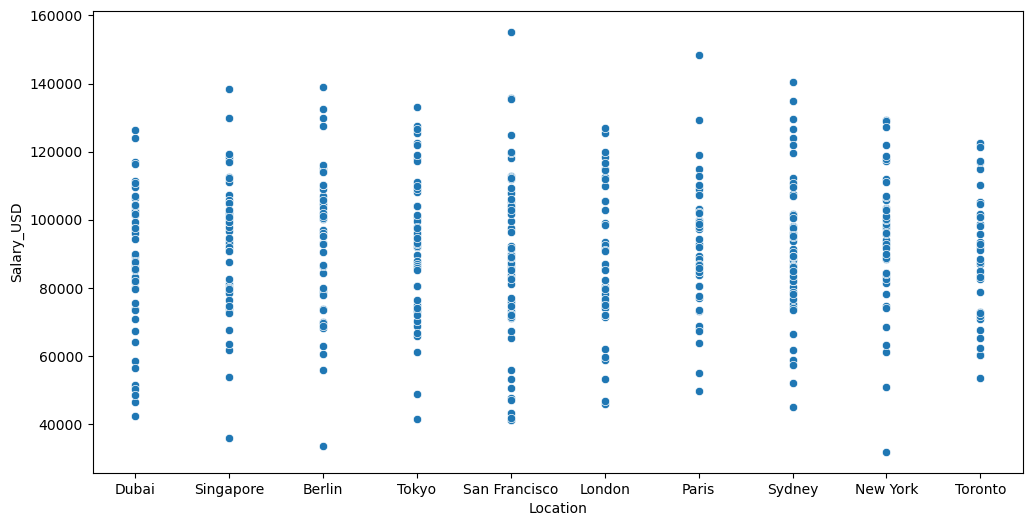

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=DS.Location,y=DS.Salary_USD)

<Axes: xlabel='Job_Title', ylabel='Salary_USD'>

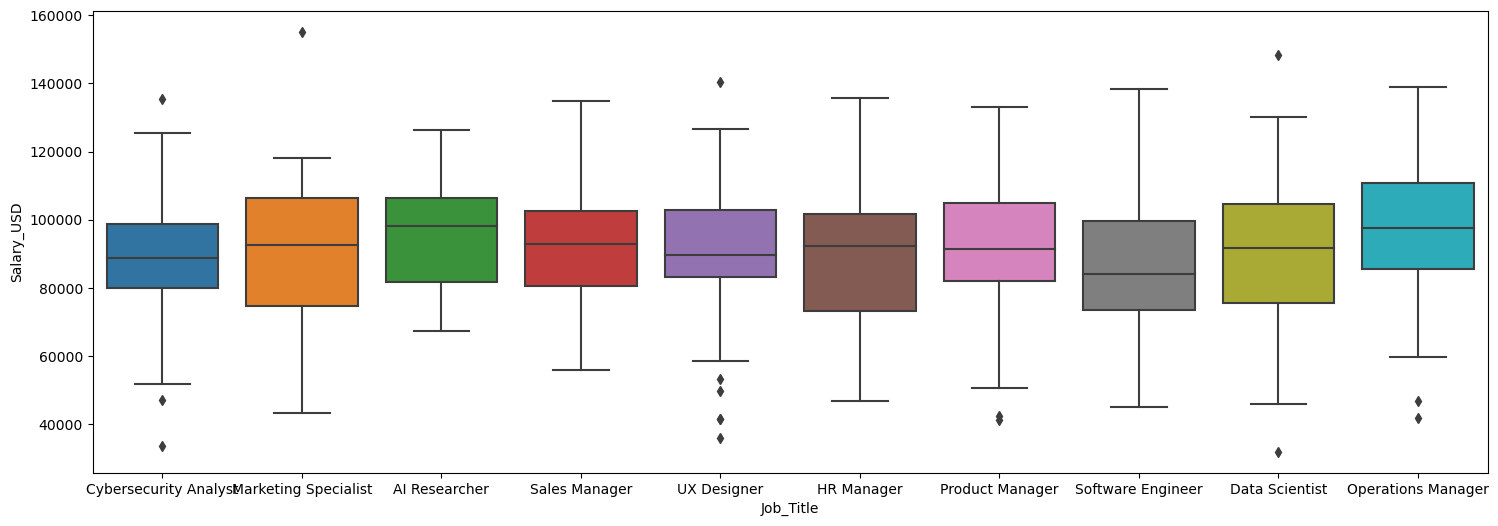

In [11]:
plt.figure(figsize=(18,6))
sns.boxplot(x='Job_Title',y='Salary_USD',data=DS)

<Axes: xlabel='Job_Title', ylabel='Salary_USD'>

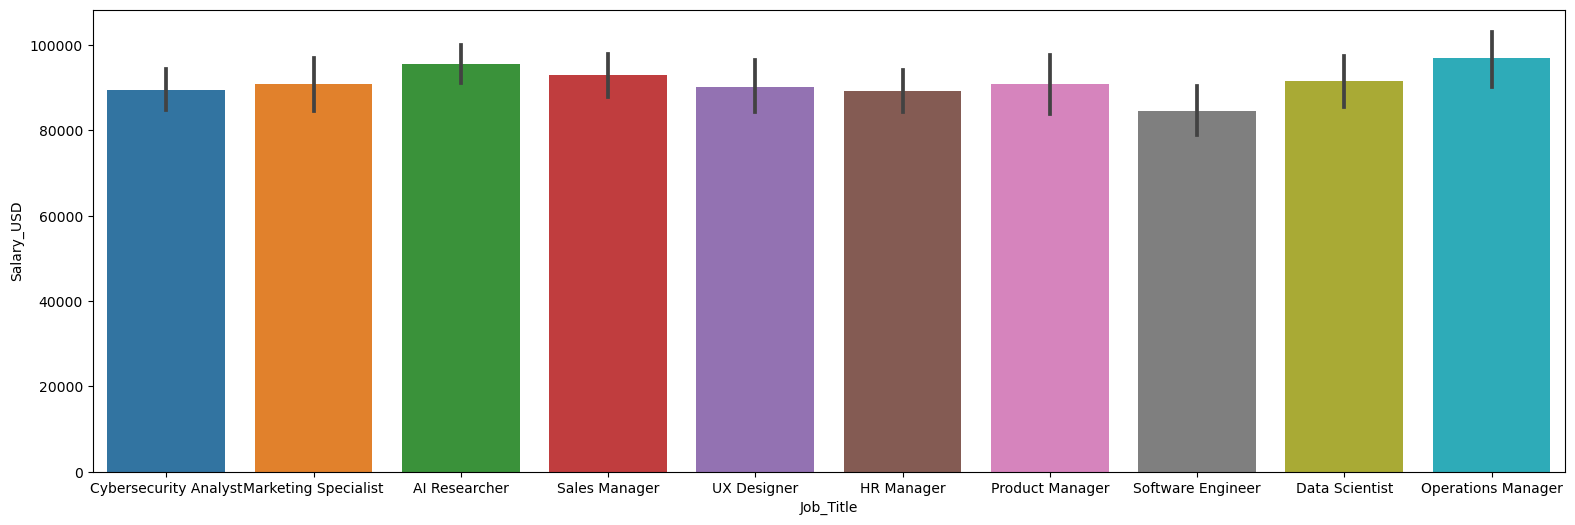

In [12]:
plt.figure(figsize=(19,6))
sns.barplot(x='Job_Title',y='Salary_USD', data=DS)

<Axes: xlabel='Salary_USD', ylabel='Industry'>

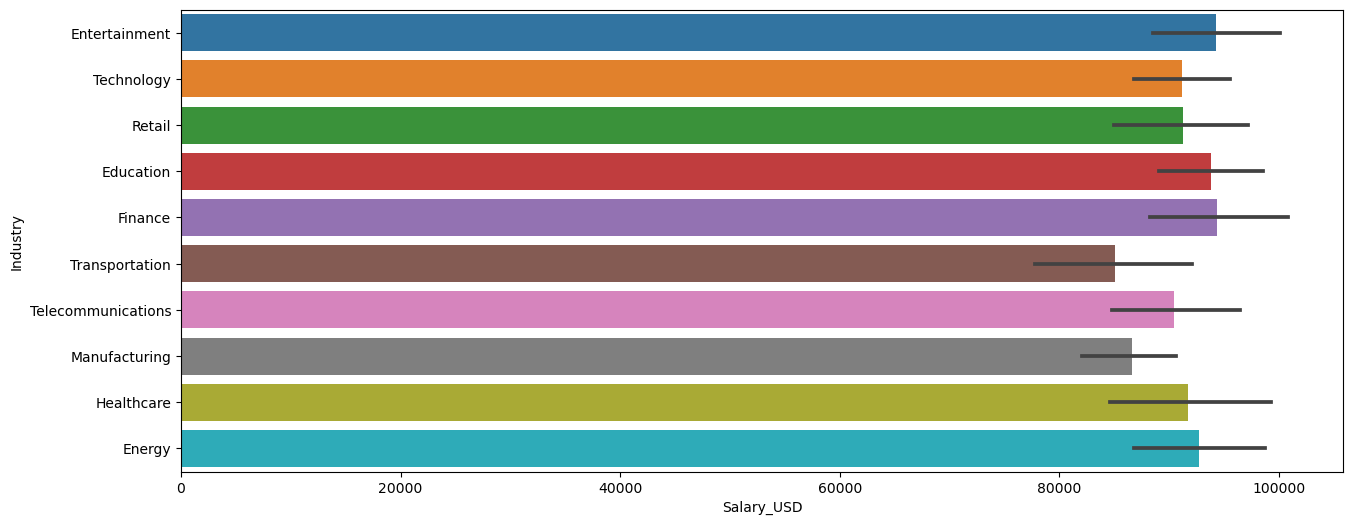

In [13]:
plt.figure(figsize=(15,6))
sns.barplot(x='Salary_USD',y='Industry', data=DS)


### Label Encoding

In [14]:
label= LabelEncoder()
DS['Automation_Risk_d']=label.fit_transform(DS['Automation_Risk'])

In [15]:
DS

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection,Automation_Risk_d
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth,0
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline,0
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth,0
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth,0
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline,1
...,...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable,2
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline,0
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable,1
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable,1


In [16]:
DS['Remote_Friendly_d']=label.fit_transform(DS['Remote_Friendly'])

In [17]:
DS['Job_Growth_Projection_d']=label.fit_transform(DS['Job_Growth_Projection'])

In [18]:
DS['Job_Title_d']=label.fit_transform(DS['Job_Title'])

In [19]:
DS['AI_Adoption_Level_d']=label.fit_transform(DS['AI_Adoption_Level'])

In [20]:
DS['Company_Size_d']=label.fit_transform(DS['Company_Size'])

In [21]:
DS

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection,Automation_Risk_d,Remote_Friendly_d,Job_Growth_Projection_d,Job_Title_d,AI_Adoption_Level_d,Company_Size_d
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth,0,1,1,1,2,2
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline,0,0,0,4,2,0
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth,0,1,1,0,2,0
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth,0,0,1,7,1,2
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline,1,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable,2,1,2,2,1,1
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline,0,0,0,1,1,2
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable,1,1,2,1,0,0
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable,1,1,2,5,0,0


In [22]:
DT=DS.drop(columns=['Job_Title','Job_Growth_Projection','Remote_Friendly','Automation_Risk'])

In [47]:
DT

,Industry,Company_Size,Location,AI_Adoption_Level,Required_Skills,Salary_USD,Automation_Risk_d,Remote_Friendly_d,Job_Growth_Projection_d,Job_Title_d,AI_Adoption_Level_d,Company_Size_d,Location_d,Industry_d,Required_Skills_d
0,Entertainment,Small,Dubai,Medium,UX/UI Design,111392.165243,0,1,1,1,2,2,87892.455505,47,49
1,Technology,Large,Singapore,Medium,Marketing,93792.562466,0,0,0,4,2,0,93739.807016,56,45
2,Technology,Large,Singapore,Medium,UX/UI Design,107170.263069,0,1,1,0,2,0,93739.807016,56,49
3,Retail,Small,Berlin,Low,Project Management,93027.953758,0,0,1,7,1,2,93240.368944,46,60
4,Entertainment,Small,Tokyo,Low,JavaScript,87752.922171,1,1,0,1,1,2,92896.553862,47,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Telecommunications,Medium,Berlin,Low,Machine Learning,105821.394046,2,1,2,2,1,1,93240.368944,53,52
496,Telecommunications,Small,London,Low,UX/UI Design,119794.992146,0,0,0,1,1,2,88810.672667,53,49
497,Energy,Large,Dubai,High,UX/UI Design,79644.933099,1,1,2,1,0,0,87892.455505,49,49
498,Healthcare,Large,Paris,High,Python,77642.150625,1,1,2,5,0,0,92116.473572,42,60


### TARGET ENCODING

In [24]:
# Calculate the mean of the target variable (Salary_USD) for each category
category_means = DT.groupby('Location')['Salary_USD'].mean()

# Map the means back to the dataset
DT['Location_d'] = DT['Location'].map(category_means)



In [25]:
DT

,Industry,Company_Size,Location,AI_Adoption_Level,Required_Skills,Salary_USD,Automation_Risk_d,Remote_Friendly_d,Job_Growth_Projection_d,Job_Title_d,AI_Adoption_Level_d,Company_Size_d,Location_d
0,Entertainment,Small,Dubai,Medium,UX/UI Design,111392.165243,0,1,1,1,2,2,87892.455505
1,Technology,Large,Singapore,Medium,Marketing,93792.562466,0,0,0,4,2,0,93739.807016
2,Technology,Large,Singapore,Medium,UX/UI Design,107170.263069,0,1,1,0,2,0,93739.807016
3,Retail,Small,Berlin,Low,Project Management,93027.953758,0,0,1,7,1,2,93240.368944
4,Entertainment,Small,Tokyo,Low,JavaScript,87752.922171,1,1,0,1,1,2,92896.553862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Telecommunications,Medium,Berlin,Low,Machine Learning,105821.394046,2,1,2,2,1,1,93240.368944
496,Telecommunications,Small,London,Low,UX/UI Design,119794.992146,0,0,0,1,1,2,88810.672667
497,Energy,Large,Dubai,High,UX/UI Design,79644.933099,1,1,2,1,0,0,87892.455505
498,Healthcare,Large,Paris,High,Python,77642.150625,1,1,2,5,0,0,92116.473572


### FREQUENCY ENCODING

In [26]:
features_count=DT['Industry'].value_counts()
DT['Industry_d']= DT['Industry'].map(features_count)

In [27]:
DT

,Industry,Company_Size,Location,AI_Adoption_Level,Required_Skills,Salary_USD,Automation_Risk_d,Remote_Friendly_d,Job_Growth_Projection_d,Job_Title_d,AI_Adoption_Level_d,Company_Size_d,Location_d,Industry_d
0,Entertainment,Small,Dubai,Medium,UX/UI Design,111392.165243,0,1,1,1,2,2,87892.455505,47
1,Technology,Large,Singapore,Medium,Marketing,93792.562466,0,0,0,4,2,0,93739.807016,56
2,Technology,Large,Singapore,Medium,UX/UI Design,107170.263069,0,1,1,0,2,0,93739.807016,56
3,Retail,Small,Berlin,Low,Project Management,93027.953758,0,0,1,7,1,2,93240.368944,46
4,Entertainment,Small,Tokyo,Low,JavaScript,87752.922171,1,1,0,1,1,2,92896.553862,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Telecommunications,Medium,Berlin,Low,Machine Learning,105821.394046,2,1,2,2,1,1,93240.368944,53
496,Telecommunications,Small,London,Low,UX/UI Design,119794.992146,0,0,0,1,1,2,88810.672667,53
497,Energy,Large,Dubai,High,UX/UI Design,79644.933099,1,1,2,1,0,0,87892.455505,49
498,Healthcare,Large,Paris,High,Python,77642.150625,1,1,2,5,0,0,92116.473572,42


In [28]:
Skill_counts= DT['Required_Skills'].value_counts()
DT['Required_Skills_d']=DT['Required_Skills'].map(Skill_counts)

In [29]:
DT

,Industry,Company_Size,Location,AI_Adoption_Level,Required_Skills,Salary_USD,Automation_Risk_d,Remote_Friendly_d,Job_Growth_Projection_d,Job_Title_d,AI_Adoption_Level_d,Company_Size_d,Location_d,Industry_d,Required_Skills_d
0,Entertainment,Small,Dubai,Medium,UX/UI Design,111392.165243,0,1,1,1,2,2,87892.455505,47,49
1,Technology,Large,Singapore,Medium,Marketing,93792.562466,0,0,0,4,2,0,93739.807016,56,45
2,Technology,Large,Singapore,Medium,UX/UI Design,107170.263069,0,1,1,0,2,0,93739.807016,56,49
3,Retail,Small,Berlin,Low,Project Management,93027.953758,0,0,1,7,1,2,93240.368944,46,60
4,Entertainment,Small,Tokyo,Low,JavaScript,87752.922171,1,1,0,1,1,2,92896.553862,47,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Telecommunications,Medium,Berlin,Low,Machine Learning,105821.394046,2,1,2,2,1,1,93240.368944,53,52
496,Telecommunications,Small,London,Low,UX/UI Design,119794.992146,0,0,0,1,1,2,88810.672667,53,49
497,Energy,Large,Dubai,High,UX/UI Design,79644.933099,1,1,2,1,0,0,87892.455505,49,49
498,Healthcare,Large,Paris,High,Python,77642.150625,1,1,2,5,0,0,92116.473572,42,60


In [30]:
Data_set=DT.drop(columns=['Industry','Company_Size','Location','AI_Adoption_Level','Required_Skills'])

In [31]:
Data_set    

,Salary_USD,Automation_Risk_d,Remote_Friendly_d,Job_Growth_Projection_d,Job_Title_d,AI_Adoption_Level_d,Company_Size_d,Location_d,Industry_d,Required_Skills_d
0,111392.165243,0,1,1,1,2,2,87892.455505,47,49
1,93792.562466,0,0,0,4,2,0,93739.807016,56,45
2,107170.263069,0,1,1,0,2,0,93739.807016,56,49
3,93027.953758,0,0,1,7,1,2,93240.368944,46,60
4,87752.922171,1,1,0,1,1,2,92896.553862,47,44
...,...,...,...,...,...,...,...,...,...,...
495,105821.394046,2,1,2,2,1,1,93240.368944,53,52
496,119794.992146,0,0,0,1,1,2,88810.672667,53,49
497,79644.933099,1,1,2,1,0,0,87892.455505,49,49
498,77642.150625,1,1,2,5,0,0,92116.473572,42,60


In [32]:
Data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Salary_USD               500 non-null    float64
 1   Automation_Risk_d        500 non-null    int32  
 2   Remote_Friendly_d        500 non-null    int32  
 3   Job_Growth_Projection_d  500 non-null    int32  
 4   Job_Title_d              500 non-null    int32  
 5   AI_Adoption_Level_d      500 non-null    int32  
 6   Company_Size_d           500 non-null    int32  
 7   Location_d               500 non-null    float64
 8   Industry_d               500 non-null    int64  
 9   Required_Skills_d        500 non-null    int64  
dtypes: float64(2), int32(6), int64(2)
memory usage: 27.5 KB


### Splitting the data to train and test set

In [33]:
X=Data_set.drop('Salary_USD', axis=1)
y=Data_set['Salary_USD']

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
scaler=StandardScaler()

In [37]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [38]:
Lr=LinearRegression(fit_intercept=True, n_jobs=-1, positive=False)

In [39]:
scores= cross_val_score(Lr, X,y,cv=5, scoring='neg_mean_squared_error')

In [40]:
mse_scores= -scores

In [41]:

print(f"Mean Squared Errors for each fold: {mse_scores}")
print(f"Average MSE across all folds: {np.mean(mse_scores)}")

Mean Squared Errors for each fold: [3.06790464e+08 4.21375760e+08 4.72201600e+08 4.31701851e+08
 4.80667281e+08]
Average MSE across all folds: 422547390.9838197


In [48]:
Lr.fit(X_train_scaled,y_train)

LinearRegression(n_jobs=-1)

In [43]:
y_pred=Lr.predict(X_test_scaled)

In [44]:
mse=mean_squared_error(y_test,y_pred)

In [45]:
print('mean_squared_Error', mse)

mean_squared_Error 490406223.6732681


In [46]:

# Get feature names if you have them
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = Lr.coef_

# Create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of the coefficient
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


                   Feature  Coefficient   Importance
6               Location_d  2243.392806  2243.392806
0        Automation_Risk_d -2156.933876  2156.933876
4      AI_Adoption_Level_d  1202.750813  1202.750813
2  Job_Growth_Projection_d   757.157227   757.157227
8        Required_Skills_d   653.509367   653.509367
3              Job_Title_d  -474.751952   474.751952
1        Remote_Friendly_d   365.361750   365.361750
5           Company_Size_d   248.258527   248.258527
7               Industry_d  -196.874304   196.874304


# Outcome and suggested work


### Interpretation of the Coefficients and Importance

- **Location_d (2243.39)** has the highest coefficient and importance, indicating that this feature has a strong and positive influence on the outcome.
- **Automation_Risk_d (-2156.93)** has a large negative coefficient, meaning it negatively affects the outcome, and it also has high importance.
- **AI_Adoption_Level_d (1202.75)**, **Job_Growth_Projection_d (757.16)**, and **Required_Skills_d (653.51)** are all positively associated with the outcome, with decreasing levels of importance as the list progresses.
- **Job_Title_d (-474.75)**, **Remote_Friendly_d (365.36)**, **Company_Size_d (248.26)**, and **Industry_d (-196.87)** show varying degrees of importance and smaller coefficients.



#### Outcome:
- **Location_d** and **Automation_Risk_d** are the two most impactful variables, with **Location_d** having a positive effect and **Automation_Risk_d** having a negative one.
- Variables related to AI adoption, job growth projections, and required skills also significantly contribute to the outcome, though their influence is smaller than the top two.
- Other features, such as **Job_Title_d**, **Remote_Friendly_d**, **Company_Size_d**, and **Industry_d**, play lesser roles but still contribute to the model's output.

#### Suggested Work:
1. **Focus on Location and Automation Risk**: Given their significant influence, further analysis or optimization of these features could provide a substantial impact. If you're working with business processes, prioritizing these aspects may yield the highest return.
   
2. **Leverage AI Adoption and Job Growth Data**: Since these factors have a positive influence on the outcome, they should be incorporated into any strategies or models to drive favorable results.

3. **Assess Smaller Impact Features**: While **Job_Title_d**, **Remote_Friendly_d**, **Company_Size_d**, and **Industry_d** are less influential, they still carry some weight. For detailed predictions, these variables can be further explored for possible interdependencies or non-linear relationships.

4. **Evaluate Model Improvement**: If you're working on improving the model, consider experimenting with regularization techniques (e.g., Lasso, Ridge) to manage the high coefficients and enhance model stability, especially for features like **Automation_Risk_d**.

5. **Feature Interaction**: Consider exploring interactions between features (e.g., how **Location_d** and **Automation_Risk_d** might interact) to uncover more nuanced relationships that could improve predictions or insights.